<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

[Просмотр ноутбука со всеми графиками через браузер](https://nbviewer.org/github/Stanislav-DS/sf_data_science/blob/main/project_2_hh/project_2_hh.ipynb)

In [60]:
import pandas as pd
import numpy as np
import plotly.express as px


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [61]:
hh_original = pd.read_csv(
    "data/dst-3.0_16_1_hh_database.csv",
    sep=";",
)
hh = hh_original.copy()


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [62]:
hh.head()


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [63]:
hh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [64]:
hh.describe()


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [65]:
hh["Образование"] = hh["Образование и ВУЗ"].apply(
    lambda x: " ".join(x.split()[:2]),
)

hh = hh.drop(columns=["Образование и ВУЗ"])

# Делаем признак категориальным и упорядоченным по убыванию уровня образования
hh["Образование"] = (
    hh["Образование"]
    .astype("category")
    .cat.reorder_categories(
        [
            "Высшее образование",
            "Неоконченное высшее",
            "Среднее специальное",
            "Среднее образование",
        ],
        ordered=True,
    )
)

# Решение задания 3.1
hh["Образование"].value_counts()


Высшее образование     33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее образование      559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [66]:
hh["Пол"] = hh["Пол, возраст"].apply(lambda x: x[0]).astype("category")

hh["Возраст"] = (
    hh["Пол, возраст"]
    .apply(
        lambda x: x.split()[2],
    )
    .astype("Int16")
)

hh = hh.drop(columns=["Пол, возраст"])

# Решение задания 3.2
women_percent = hh["Пол"].value_counts(normalize=True)["Ж"]
mean_age = hh["Возраст"].mean()
print(
    f"Процент женщин среди соискателей: {women_percent:0.2%}.\n"
    f"Средний возраст соискателей: {mean_age:0.1f} года."
)


Процент женщин среди соискателей: 19.07%.
Средний возраст соискателей: 32.2 года.


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [67]:
def experience_processing(val: str) -> int:
    """Извлечение опыта работы и преобразование в месяцы."""

    # Проверка отсутствующих значений.
    if pd.isna(val) or val == "Не указано":
        return np.nan

    val = val.split()

    # Проверка указания месяцев без указания лет.
    if val[2].isdigit() and "месяц" in val[3]:
        return int(val[2])

    # Проверка указания лет.
    if val[2].isdigit() and sum([x in val[3] for x in ("год", "лет")]):
        exp_month = 12 * int(val[2])

        # Проверка указания месяцев после лет.
        if val[4].isdigit() and "месяц" in val[5]:
            exp_month += int(val[4])

        return exp_month


hh["Опыт работы (месяц)"] = (
    hh["Опыт работы"]
    .apply(
        experience_processing,
    )
    .astype("Int16")
)

hh = hh.drop(columns=["Опыт работы"])

# Задание 3.3
print(
    "Медианный опыт работы соискателей "
    f"{hh['Опыт работы (месяц)'].median():.0f} месяцев."
)


Медианный опыт работы соискателей 100 месяцев.


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [68]:
def city(val: str) -> str:
    """Извлечение данных о городе соискателя."""

    million_cities = [
        "Новосибирск",
        "Екатеринбург",
        "Нижний Новгород",
        "Казань",
        "Челябинск",
        "Омск",
        "Самара",
        "Ростов-на-Дону",
        "Уфа",
        "Красноярск",
        "Пермь",
        "Воронеж",
        "Волгоград",
    ]

    val = val.split(" , ")[0]

    if val == "Москва" or val == "Санкт-Петербург":
        return val
    elif val in million_cities:
        return "город-миллионник"
    else:
        return "другие"


def moving(val: str) -> bool:
    """Извлечение данных о готовности соискателя к переезду."""

    val = val.split(" , ")

    # Проверка наличия сведений о станции метро и, в зависимости от этого,
    # извлечение сведений о готовности к переезду.
    val = val[2] if val[1].split()[0] == "м." else val[1]
    return val.split()[0] != "не"


def business_trip(val: str) -> bool:
    """Извлечение данных о готовности соискателя к командировкам."""

    val = val.split(" , ")

    # Проверка наличия сведений о станции метро и, в зависимости от этого,
    # извлечение сведений о готовности к командировкам.
    if val[1].split()[0] == "м.":
        return val[-1].split()[0] != "не" if len(val) == 4 else False
    else:
        return val[-1].split()[0] != "не" if len(val) == 3 else False


# Добавление новых признаков в дата-фрейм.

# Признак города делаем упорядоченным
hh["Город"] = (
    hh["Город, переезд, командировки"]
    .apply(city)
    .astype("category")
    .cat.reorder_categories(
        [
            "Москва",
            "Санкт-Петербург",
            "город-миллионник",
            "другие",
        ],
        ordered=True,
    )
)

hh["Готовность к переезду"] = (
    hh["Город, переезд, командировки"]
    .apply(
        moving,
    )
    .astype("category")
)

hh["Готовность к командировкам"] = (
    hh["Город, переезд, командировки"]
    .apply(
        business_trip,
    )
    .astype("category")
)

# Решение задачи 3.4
piter = hh["Город"].value_counts(normalize=True)["Санкт-Петербург"]

moving_f = hh["Готовность к переезду"] == True
trip_f = hh["Готовность к командировкам"] == True
moving_and_trip = hh[moving_f & trip_f].shape[0] / len(hh)

print(
    f"Соискателей из Санкт-Петербурга: {piter:.0%}.\n"
    f"Готовы к переезду и командировкам {moving_and_trip:.0%}"
    " от общего числа соискателей."
)


Соискателей из Санкт-Петербурга: 11%.
Готовы к переезду и командировкам 32% от общего числа соискателей.


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [69]:
one_hot_encoding_df = pd.DataFrame(
    {
        "Занятость": [
            "полная занятость",
            "частичная занятость",
            "проектная работа",
            "волонтерство",
            "стажировка",
        ],
        "График": [
            "полный день",
            "сменный график",
            "гибкий график",
            "удаленная работа",
            "вахтовый метод",
        ],
    }
)

# Добавление новых признаков в дата-фрейм.
for name, values in one_hot_encoding_df.items():
    for val in values:
        hh[val] = hh[name].apply(lambda x: val in x)

hh = hh.drop(columns=list(one_hot_encoding_df))

# Решение задания 3.5
project_work = hh["проектная работа"] == True
volunteering = hh["волонтерство"] == True
num_proj_and_volunt = hh[project_work & volunteering].shape[0]

shift_method = hh["вахтовый метод"] == True
flexible_schedule = hh["гибкий график"] == True
num_shift_and_flex = hh[shift_method & flexible_schedule].shape[0]

print(
    f"Проектную работы и волонтерство ищут {num_proj_and_volunt}"
    " соискателей.\n"
    "Вахтовым методом и с гибким графиком намерены работать"
    f" {num_shift_and_flex} соискателей."
)


Проектную работы и волонтерство ищут 436 соискателей.
Вахтовым методом и с гибким графиком намерены работать 2311 соискателей.


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [70]:
# Список с именами обрабатываемого и промежуточных столбцов
# в основном фрейме (hh), которые впоследствии будут удалены.
salary = ["ЗП", "ЗП_сумма", "currency_hh", "currency_ISO", "Дата резюме"]

# Таблица с наименованиями валют для подтягивания в основной фрейм.
currency_ISO_df = pd.DataFrame(
    data=[
        ["грн", "UAH"],
        ["USD", "USD"],
        ["EUR", "EUR"],
        ["белруб", "BYN"],
        ["KGS", "KGS"],
        ["сум", "UZS"],
        ["AZN", "AZN"],
        ["KZT", "KZT"],
        ["руб", "руб"],
    ],
    columns=["currency_hh", "currency_ISO"],
)

# Извлечение в промежуточные столбцы сведений о сумме и валюте ЗП.
hh["ЗП_сумма"] = hh["ЗП"].apply(
    lambda x: float(x.split()[0]),
)
hh["currency_hh"] = hh["ЗП"].apply(
    lambda x: x.split()[1].replace(".", ""),
)

# Подтягивание в основной фрейм наименований валют в стандарте ISO.
hh = pd.merge(hh, currency_ISO_df, how="left")

# Чтение файла с курсами валют.
exchange_rates = pd.read_csv("data/ExchangeRates.csv")

# Приведение сведений о датах и времени курсов валют и обновлений резюме
# к формату datetime и извлечение из них дат.
hh["Обновление резюме"] = pd.to_datetime(
    hh["Обновление резюме"],
    dayfirst=True,
)
exchange_rates["date"] = pd.to_datetime(
    exchange_rates["date"],
    dayfirst=True,
).dt.date
hh["Дата резюме"] = hh["Обновление резюме"].dt.date

# Подтягивание в основной фрейм сведений о курсе валюты на дату резюме.
hh = pd.merge(
    hh,
    exchange_rates,
    left_on=["currency_ISO", "Дата резюме"],
    right_on=["currency", "date"],
    how="left",
)

# Вычисление зарплаты соискателя в рублях по курсу на дату резюме.
hh["ЗП (руб)"] = hh["ЗП_сумма"] * \
    hh["close"].fillna(1) / hh["proportion"].fillna(1)

# Удаление обрабатываемого и промежуточных столбцов.
hh = hh.drop(columns=salary)
# Удаление столбцов, которые были подтянуты из таблицы курсов валют.
hh = hh.drop(columns=list(exchange_rates))

# Решение задания 3.6
zp = hh["ЗП (руб)"].median() 
print(f"Мединная зарплата соискателя составляет {zp/1000:.0f} тыс. руб.")

Мединная зарплата соискателя составляет 59 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

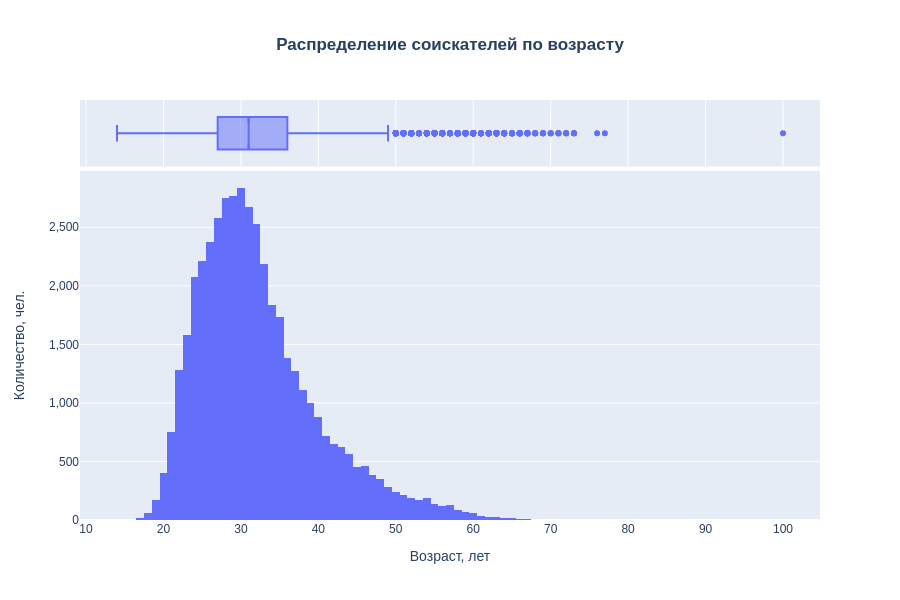

Асимметрия распределения = 1.1253329435773052


In [71]:
fig = px.histogram(
    data_frame=hh,
    title="<b>Распределение соискателей по возрасту</b>",
    x="Возраст",
    marginal="box",
    width=900,
    height=600,
)

fig.update_layout(
    title_x=0.5,
    xaxis_title_text="Возраст, лет",
    yaxis_title_text="Количество, чел.",
    yaxis_tickformat=",.0f",
)

fig.show("png")
asymmetry = hh["Возраст"].skew()
print(f"Асимметрия распределения = {asymmetry}")
# fig.write_html("graphs/graph1.html")

**Выводы**

* Распределение соискателей по возрасту похоже на нормальное, имеет правостороннюю асимметрию.<br><br>
* Численность соискателей в возрасте от 20 до 30 лет резко возрастает, затем, с 30 до 36 лет лавинообразно снижается, а после 36 лет, тоже снижается, но значительно более плавно.<br><br>
* Модальным значением является 30 лет (2834 человека), медиана - 31 год.<br><br>
* Большинство претендентов имеет возраст от 27 до 36 лет.<br><br> 
* К аномальным можно отнести значения, выходящие за пределы трудоспособного возраста - один сосикатель якобы имеет возраст 14 лет, один - 100 лет, и порядка 20 человек находятся в возрасте от 65 до 78 лет.

[Скачать график в html](https://cloud.mail.ru/public/DDmH/FcDrRNVC8)

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

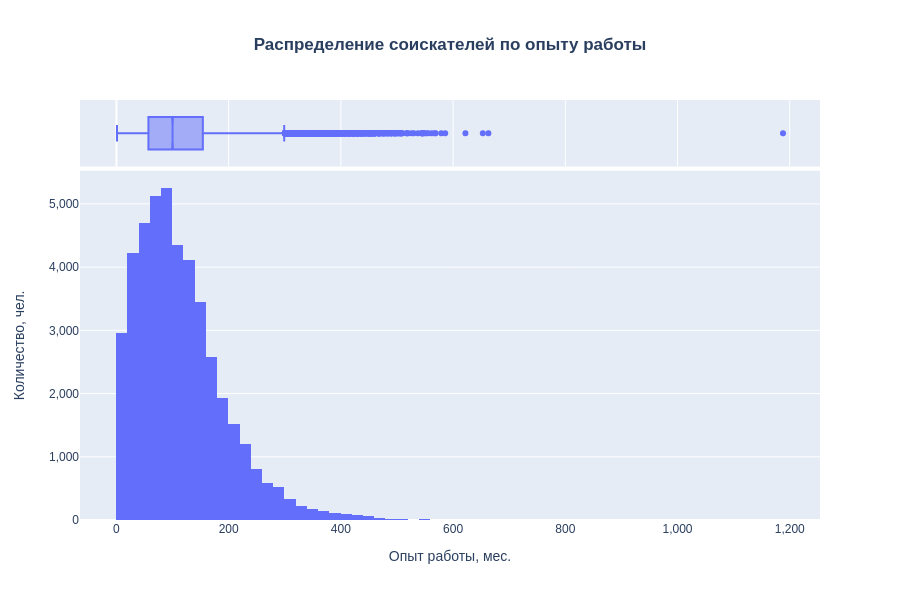

Асимметрия распределения = 1.2767055410929742


In [72]:
fig = px.histogram(
    data_frame=hh,
    title="<b>Распределение соискателей по опыту работы</b>",
    x="Опыт работы (месяц)",
    marginal="box",
    nbins=100,
    width=900,
    height=600,
)

fig.update_layout(
    title_x=0.5,
    xaxis_title_text="Опыт работы, мес.",
    xaxis_tickformat=",.0f",
    yaxis_title_text="Количество, чел.",
    yaxis_tickformat=",.0f",
)

fig.show("png")
asymmetry = hh["Опыт работы (месяц)"].skew()
print(f"Асимметрия распределения = {asymmetry}")
# fig.write_html("graphs/graph2.html")


**Выводы**

* Распределение соискателей по опыту работу похоже на нормальное, имеет правосторонню асимметрию.<br><br>
* Предельные значения признака: 1 и 1188 мес.<br><br>
* Модальным значением является 80-99 месяцев (5249 человек), медиана - 100 месяцев.<br><br>
* Большинство претендентов имеет опыт от 57 до 154 мес.<br><br> 
* К аномальным можно отнести значения опыта работы, выходящего за пределы трудоспособного возраста, т.е. превышащего 564 мес (65-18=47 лет). Значение 1188 мес, являющееся верхним пределом распределения, очевидно является выбросом, т.к. соответствует опыту работы 99 лет. 

[Скачать график в html](https://cloud.mail.ru/public/y7PK/8dc3Kxajh)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


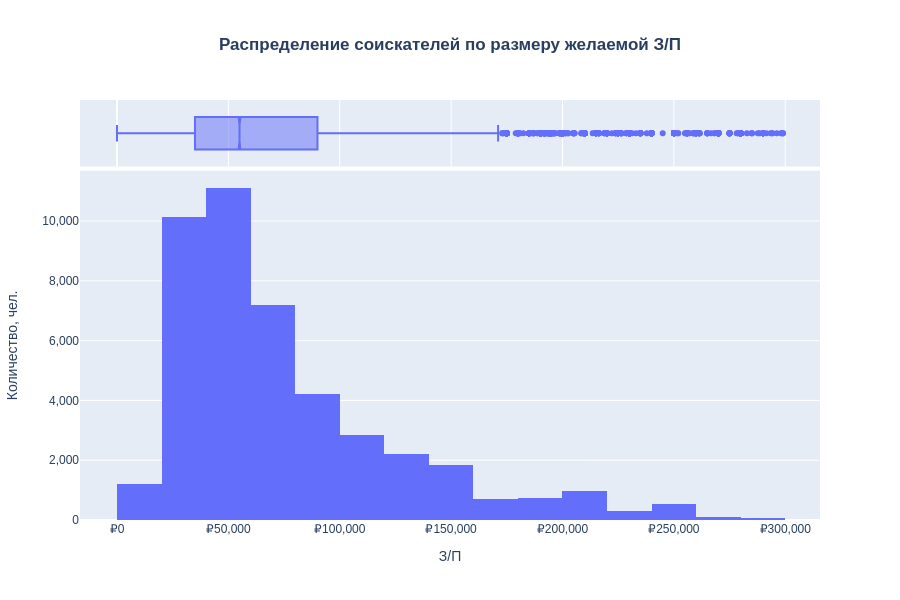

Асимметрия распределения = 1.568698873783589


In [73]:
fig = px.histogram(
    data_frame=hh[(hh["ЗП (руб)"] < 300000)],
    title="<b>Распределение соискателей по размеру желаемой З/П</b>",
    x="ЗП (руб)",
    marginal="box",
    nbins=20,
    width=900,
    height=600,
)

fig.update_layout(
    title_x=0.5,
    xaxis_title_text="З/П",
    xaxis_tickformat=",.0f",
    xaxis_tickprefix="₽",
    yaxis_tickformat=",.0f",
    yaxis_title_text="Количество, чел.",
)

fig.show("png")
asymmetry = hh[(hh["ЗП (руб)"] < 300000)]["ЗП (руб)"].skew()
print(f"Асимметрия распределения = {asymmetry}")
# fig.write_html("graphs/graph3.html")


**Выводы**

* Распределение соискателей по размеру желаемой З/П похоже на нормальное, имеет ярко выраженную правостороннюю асимметрию.<br><br>
* Желаемая заработная плата соискателей находится в диапазоне от 1 руб. до 24 млн. рублей.<br><br>
* Большинство претендует на зарплату от 35 тыс. руб. до 90 тыс рублей.<br><br>
* На зарплату свыше 260 тыс. рублей предендует небольшое число соискателей, а цифру, превышающую 280 тыс. рублей, указывают в резюме единицы.<br><br>
* К аномалиям однозначно можно причислить размер заработной платы менее 1000 рублей и более 1 млн. рублей.

[Скачать график в html](https://cloud.mail.ru/public/B6Lx/RHBppZJy2)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

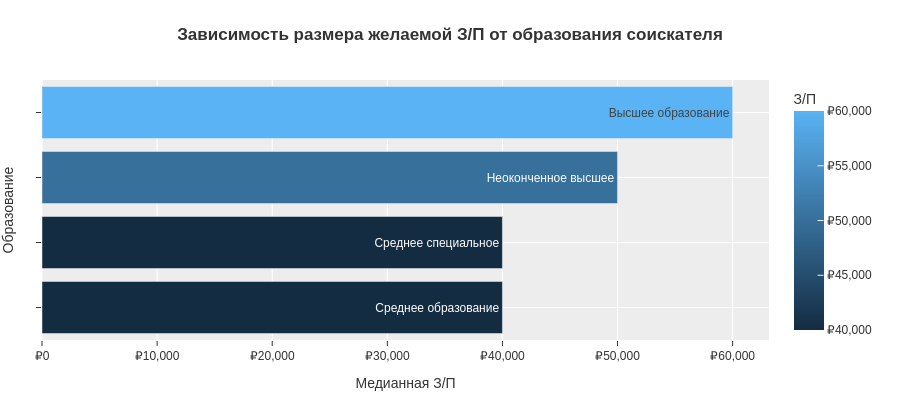

In [74]:
hh_proc = hh[hh["ЗП (руб)"] < 1000000].groupby(
    "Образование")["ЗП (руб)"].median()

# Обратная сортировка для вывода на графике в удобочитаемом порядке
# (чтобы высшее образование было сверху).
hh_proc.sort_index(ascending=False, inplace=True)

# --------------------
# Построение графика
# --------------------
fig = px.bar(
    data_frame=hh_proc,
    x=hh_proc,
    y=hh_proc.index,
    color=hh_proc,
    orientation="h",
    text=hh_proc.index,
    template="ggplot2",
)


fig.update_layout(
    title_text="<b>Зависимость размера желаемой З/П от образования соискателя</b>",
    margin=dict(t=80, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Медианная З/П",
    xaxis_tickformat=",.0f",
    xaxis_tickprefix="₽",
    yaxis_title="Образование",
    yaxis_showticklabels=False,
    coloraxis_colorbar_title_text="З/П",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_tickprefix="₽",
    showlegend=False,
)

fig.update_traces(hovertemplate="₽%{x:,.0f}")

fig.show("png")
# fig.write_html("graphs/graph4.html")

**Выводы**

* Наибольшая желамая зарплата у соискателей с высшим образованием, её медианное значение составляет 60 тыс. руб., наименьшая - со средним-специальным и средним образованием - 40 тыс. руб.<br><br>
* Для прогнозирования заработной платы уровень образования безусловно играет важное значение. 

[Скачать график в html](https://cloud.mail.ru/public/icmk/mp9vCawtw)

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

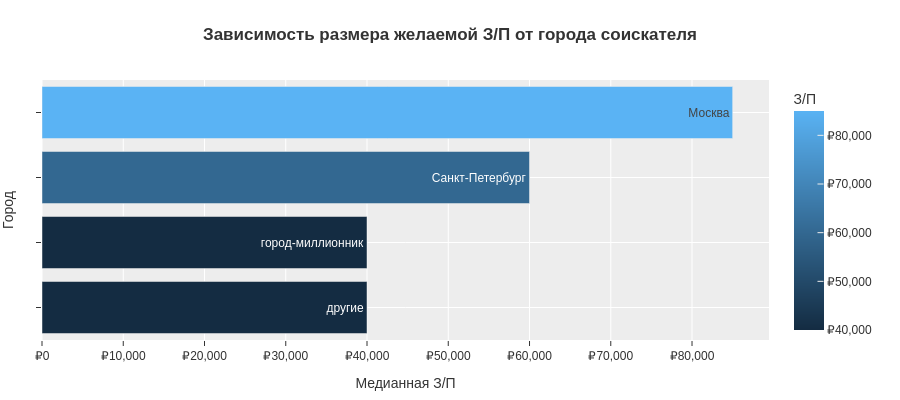

In [75]:
# Подсчет медианной зарплаты для интересующих категорий.
hh_proc = hh[hh["ЗП (руб)"] < 1000000].groupby("Город")["ЗП (руб)"].median()

# Сортировка значений для отображения на диаграмме в удобочитаемом порядке
hh_proc.sort_index(inplace=True)


# --------------------
# Построение графика
# --------------------
fig = px.bar(
    data_frame=hh_proc,
    x=hh_proc,
    y=hh_proc.index,
    color=hh_proc,
    orientation="h",
    text=hh_proc.index,
    category_orders={"Город": list(hh_proc.index)},
    template="ggplot2",
)


fig.update_layout(
    title_text="<b>Зависимость размера желаемой З/П от города соискателя</b>",
    margin=dict(t=80, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Медианная З/П",
    xaxis_tickformat=",.0f",
    xaxis_tickprefix="₽",
    yaxis_title="Город",
    yaxis_showticklabels=False,
    coloraxis_colorbar_title_text="З/П",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_tickprefix="₽",
    showlegend=False,
)

fig.update_traces(hovertemplate="₽%{x:,.0f}")

fig.show("png")
# fig.write_html("graphs/graph5.html")


**Выводы**

* Наибольшее медианное значение желаемые зарплаты в Москве (85 тыс. руб.) и Санкт-Петербурге (60 тыс. руб.) в остальных городах миллионниках уровень зарплаты соискателей не отличается от иных населенных пунктов - 40 тыс. руб.<br><br>
* Город соискателя безусловно важен при прогнозировании уровня желаемой заработной платы.

[Скачать график в html](https://cloud.mail.ru/public/LKfD/J3S8bB9iZ)

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

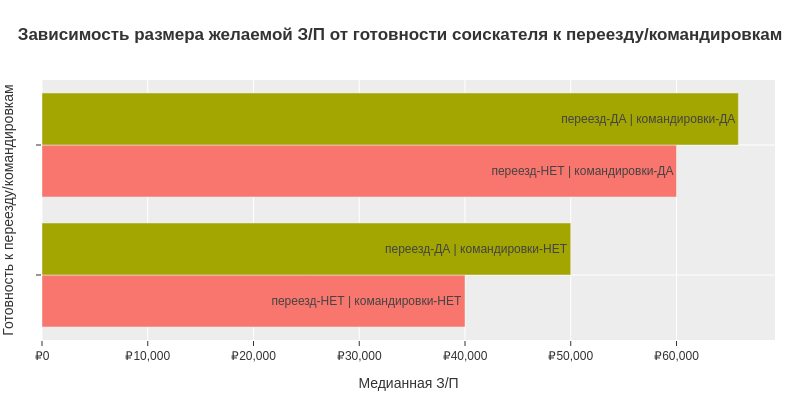

In [76]:
# --------------------
# Подготовка данных.
# --------------------
# Подсчет медианной зарплаты для интересующих категорий.
hh_proc = hh.groupby(
    ["Готовность к командировкам", "Готовность к переезду"], as_index=False
)["ЗП (руб)"].median()


# Подготовка названий категорий для отображения на диаграмме.
readiness = ["НЕТ", "ДА"]

hh_proc["Переезд"] = (
    hh_proc["Готовность к переезду"]
    .apply(
        lambda x: "переезд-" + readiness[x],
    )
    .astype(str)
)

hh_proc["Командировки"] = (
    hh_proc["Готовность к командировкам"]
    .apply(
        lambda x: "командировки-" + readiness[x],
    )
    .astype(str)
)

hh_proc["Готовность"] = (hh_proc["Переезд"] + " | " + hh_proc["Командировки"]).astype(
    "category"
)

# --------------------
# Построение графика
# --------------------
fig = px.bar(
    data_frame=hh_proc,
    y="Готовность к командировкам",
    x="ЗП (руб)",
    barmode="group",
    color="Готовность к переезду",
    orientation="h",
    text=hh_proc["Готовность"],
    template="ggplot2",
)


fig.update_layout(
    title_text="<b>Зависимость размера желаемой З/П от готовности соискателя к переезду/командировкам</b>",
    margin=dict(t=80, l=25, r=25, b=25),
    title_x=0.5,
    width=800,
    height=400,
    xaxis_title="Медианная З/П",
    xaxis_tickformat=",.0f",
    xaxis_tickprefix="₽",
    yaxis_title="Готовность к переезду/командировкам",
    yaxis_showticklabels=False,
    coloraxis_colorbar_tickprefix="₽",
    showlegend=False,
)

fig.show("png")
# fig.write_html("graphs/graph6.html")


**Выводы**

* Наибольшая желаемая З/П (65 тыс. руб.) у соискателей готовых и к переезду, и к командировкам.<br><br>
* Наименьшая З/П (40 тыс. руб.) - у тех, кто не готов к каким-либо перемещениям.<br><br>
* З/П у категории соискателей готовой только к командировкам (60 тыс. руб.) выше, чем у категории готовой только к пеерезду (50 тыс. руб.).

[Скачать график в html](https://cloud.mail.ru/public/YC6o/hhWv9nMv8)

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

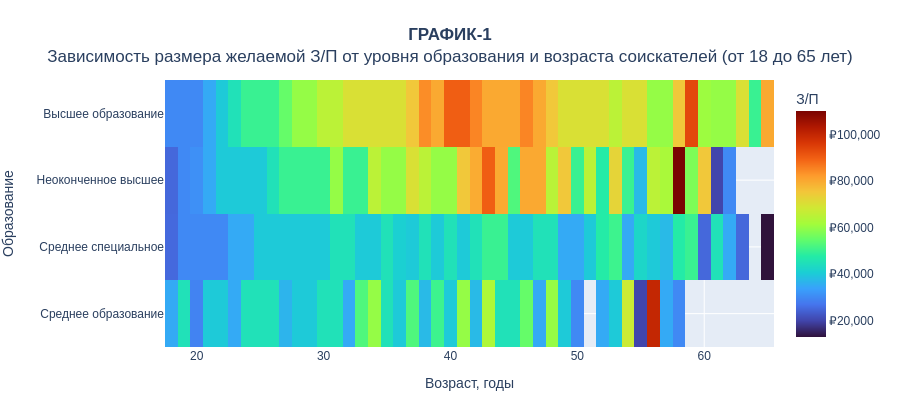

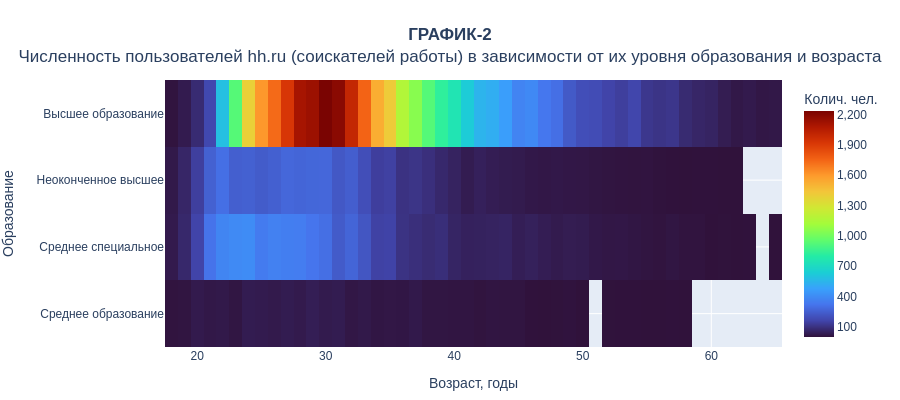

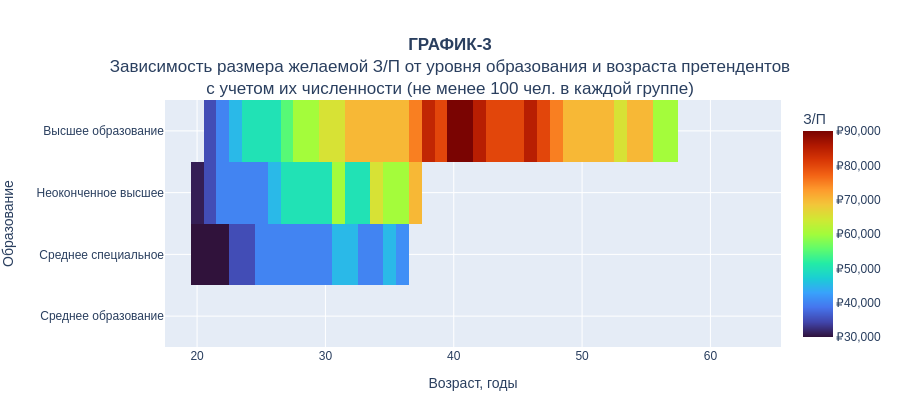

In [77]:
# Сводная таблица с данными о медиане желаемой З/П
# в зависимости от уровня образования и возраста.
hh_proc = hh[(hh["Возраст"] >= 18) & (hh["Возраст"] <= 65)].pivot_table(
    index="Образование",
    columns="Возраст",
    values="ЗП (руб)",
    aggfunc=np.median,
)

# Сводная таблица с данными о численности соискателей
# по уровню образования и возрасту.
hh_count = hh[(hh["Возраст"] >= 18) & (hh["Возраст"] <= 65)].pivot_table(
    index="Образование",
    columns="Возраст",
    values="ЗП (руб)",
    aggfunc=len,
)

# Тепловая карта соотношения медианной З/П с уровнем образования и возрастом
fig1 = px.imshow(
    hh_proc,
    color_continuous_scale="turbo",  # цветовая гамма
)


fig1.update_layout(
    title_text="<br>".join(
        [
            "<b>ГРАФИК-1</b>",
            "Зависимость размера желаемой З/П от уровня образования и возраста соискателей (от 18 до 65 лет)",
        ]
    ),
    margin=dict(t=80, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Возраст, годы",
    coloraxis_colorbar_title_text="З/П",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_tickprefix="₽",
    showlegend=False,
)


# Настройка шаблона наведения курсора мыши
fig1.update_traces(
    customdata=hh_count,
    hovertemplate="<br>".join(
        [
            "Возраст: %{x:.0f}",
            "%{y}",
            "Желаемая З/П: ₽%{z:,.0f}",
            "Соискателей: %{customdata} чел.",
        ]
    ),
    name="",
)

# Тепловая карта численности соискателей по уровню образования и возрасту
fig2 = px.imshow(
    hh_count,
    color_continuous_scale="turbo",  # цветовая гамма
)


fig2.update_layout(
    title_text="<br>".join(
        [
            "<b>ГРАФИК-2</b>",
            "Численность пользователей hh.ru (соискателей работы) в зависимости от их уровня образования и возраста",
        ]
    ),
    margin=dict(t=80, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Возраст, годы",
    coloraxis_colorbar_title_text="Колич. чел.",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_dtick=100,
    coloraxis_colorbar_tick0=100,
    coloraxis_colorbar_ticklabelstep=3,
    showlegend=False,
)


# Настройка шаблона наведения курсора мыши
fig2.update_traces(
    customdata=hh_proc,
    hovertemplate="<br>".join(
        [
            "Возраст: %{x:.0f}",
            "%{y}",
            "Соискателей: %{z:,.0f} чел.",
            "Желаемая З/П: ₽%{customdata:,.0f}",
        ]
    ),
    name="",
)


# Для получения репрезентативных данных по исследуемой зависимости
# удаляем из сводной таблицы З/П сведений по тем группам, по которых представлено менее 100 резюме.
for row in range(hh_proc.shape[0]):
    for col in range(hh_proc.shape[1]):
        if hh_count.iloc[row, col] < 100:
            hh_proc.iat[row, col] = np.nan
            pass

# Тепловая карта соотношения медианной З/П с уровнем образования и возрастом
# с учетом численности групп.
# (более 100 резюме для каждой отображаемой на графике группы).
fig3 = px.imshow(
    hh_proc,
    color_continuous_scale="turbo",  # цветовая гамма
)


fig3.update_layout(
    title_text="<br>".join(
        [
            "<b>ГРАФИК-3</b>",
            "Зависимость размера желаемой З/П от уровня образования и возраста претендентов",
            "с учетом их численности (не менее 100 чел. в каждой группе)",
        ]
    ),
    margin=dict(t=100, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Возраст, годы",
    coloraxis_colorbar_title_text="З/П",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_tickprefix="₽",
    showlegend=False,
)


# Настройка шаблона наведения курсора мыши
fig3.update_traces(
    customdata=hh_count,
    hovertemplate="<br>".join(
        [
            "Возраст: %{x:.0f}",
            "%{y}",
            "Желаемая З/П: ₽%{z:,.0f}",
            "Соискателей: %{customdata:,.0f} чел.",
        ]
    ),
    name="",
)


fig1.show("png")
fig2.show("png")
fig3.show("png")
# fig1.write_html("graphs/graph7.html")
# fig2.write_html("graphs/graph8.html")
# fig3.write_html("graphs/graph9.html")

**Этапы выполнения задания (исследование зависимости медианной З/П от уровня образования и возраста соискателя**)

1. При построении графиков использовались сведения о лицах от 18 до 65 лет. Из данных исключены сведения о лицах нетрудоспособного возраста, т.к. факты размещения резюме с указанием такого возраста носят единичный характер, их можно отнести к выбросам, а построение графика на их основе очевидно привело бы к недостоверным выводам по исследуемой зависимости.<br><br>
1. Построена сводная таблица и на её основе тепловая карта зависимости медианы желаемой З/П от образования и возраста (**график-1**).<br><br>
2. С целью анализа репрезентивности графика-1 построена сводная таблица численности соискателей, разместивших резюме на hh.ru, в зависимости от их образования и возраста. Данные о численности соискателей выведены в ховерах графика-1, а также построена тепловая карта численности соискателей в зависимости от образования и возраста (**график-2**).<br><br> 
3. С учетом анализа графика-1 и графика-2, из сводной таблицы З/П (построенной в п.2) исключены сведения по группам, для которых представлено недостаточное для достоверных выводов количество наблюдений (менее ста претендентов для данного уровня образования и года рождения) и на основе сделанной выборки построена тепловая карта (**график-3**).<br><br>

**Выводы**

1. Анализ **графика-1** показал, что крайне затруднительно сделать достоверные выводы по исследуемой зависимости (З/П от образования и возраста ) ввиду наличия в выборке нерепрезентативных сведений, содержащих малое количество наблюдений по отдельно взятым группам - по которым численность претендентов, имеющих данный уровень образования и год рождения, - менее 100 человек<br><br><br>
2. Анализ **графика-2** (тепловой карты численности пользователей hh.ru по уровню образования и возрасту) показал:<br><br> 
    * наиболее популярным сайт hh.ru является среди соискателей работы с высшим образованием в возрасте от 21 до 57 лет; <br><br>
    * лиц со средним специальным и неоконченным высшим образованием среди пользователей сайта значительно (в несколько раз) меньше; <br><br>
    * подавляющее большинство пользователей сайта с неоконченным высшим и со средним-специальным образованием, разместившие свои резюме, находятся в возрасте от 20 до 37 лет; <br><br>
    * лица со средним образованием сайтом пользуются крайне редко независимо от возраста, данных по этой категории для получения достоверных выводов о желаемой З/П недостаточно.<br><br><br>
3. Анализ **графика-3** (зависимость З/П от образования и возраста с учетом численности претендентов) показал:<br><br> 
    * медиана желаемой З/П уменьшается со снижением уровня образования.<br><br>
    * самая многочисленная группа - соискатели с **высшим образованием** - имеет и наиболее высокую желаемую З/П, которая с увеличением возраста сначала повышается: от 35 тыс. руб. для 21 года, до 90 тыс. руб. для 41 года, а затем снижается вплоть до 60 тыс. руб. для 57 лет.<br><br> 
    * у лиц с **неоконченным высшим образованием** запросы по З/П ожидаемо ниже чем у соискателей, имеющих диплом ВУЗа. На наиболее низкую З/П в данной категории претендуют соискатели в возрасте 20 лет (31 тыс. руб), затем, с увеличением возраста, у исследуемого значения (З/П) наблюдается тенденция к росту. Максимальную З/П (70 тыс. руб) желают иметь соискатели в возрасте 37 лет. Сведения о лицах старше 37 лет на графике не отображены, ввиду их малой численности, которая объясняется либо получением к этому возрасту подавляющим большинством высшего образования, либо нераспространненностью hh.ru для поиска работы среди лиц, кто в 37 лет всё еще имеет лишь неоконченное высшее образование.<br><br>
    * у лиц со **средним специальным образованием** наблюдается та же тендеция по изменению размера З/П в зависимости от возраста, что и у лиц с н/высшим, но уровень желаемой З/П у них ожидаемо ниже. Он меняется от 30 тыс. для 20-22 лет, до 45 тыс для 35 лет. Сведения о лицах старше 36 лет по данной категории на графике не отображены ввиду малого количества наблюдений (т.е. размещенных на hh.ru резюме), что вероятно объясняется теми же причинами, что и в предыдущем случае: либо соискатели к 36 годам уже имеют как минимум н/высшее образование, либо в принципе не используют hh.ru.


[Скачать график-1 в html](https://cloud.mail.ru/public/ECSd/hu99eSqU3)

[Скачать график-2 в html](https://cloud.mail.ru/public/zeD1/T4T3G6ybn)

[Скачать график-3 в html](https://cloud.mail.ru/public/mNLd/MqCEPftD5)

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

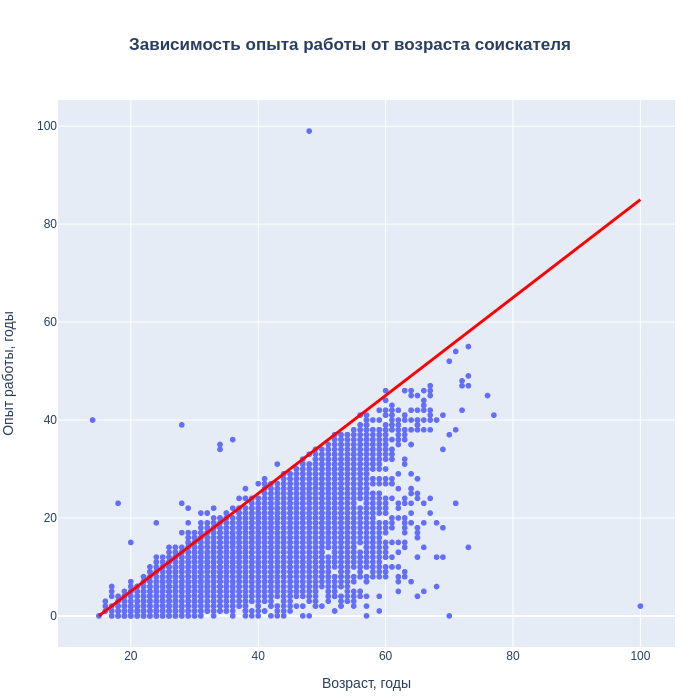

In [78]:
hh["Опыт работы (год)"] = (hh["Опыт работы (месяц)"] / 12).round()

fig = px.scatter(
    hh,
    y="Опыт работы (год)",
    x="Возраст",
)

fig.update_layout(
    title_text="<b>Зависимость опыта работы от возраста соискателя</b>",
    margin=dict(t=100, l=25, r=25, b=25),
    title_x=0.5,
    width=700,
    height=700,
    xaxis_title="Возраст, годы",
    yaxis_title="Опыт работы, годы",
    showlegend=False,
)

fig.add_shape(
    type="line",
    x0=15,
    y0=0,
    x1=100,
    y1=85,
    line=dict(
        color="Red",
        width=3,
        # dash="dot",
    ),
)

fig.show("png")
# fig.write_html("graphs/graph10.html")


**Выводы**

* У лиц, разместивших резюме, независимо от возраста, опыт работы находится в диапазоне от 0 лет до возраста соискателя минус 15 лет.<br><br>
* Значительное число соискателей завышают себе опыт работы, когда <br>$(возраст - опыт) < 16 лет$<br> т.е. соискатель якобы начал работать, находясь в нетрудоспособном возрасте.<br><br> 
* После 30 лет количество претендентов с маленьким опытом или без опыта уменьшается.<br><br> 
* После 40 лет уменьшается количество лиц явно завышающих себе опыт работы.<br><br> 
* Приблизительно до 50 лет, независимо от возраста, имеются соискатели с небольшим опытом работы, либо вообще без опыта.<br><br>
* После 60 лет большинство претендентов имеют опыт работы более 30 лет.<br><br>
* На графике имеется 7 выбросов (когда опыт работы больше либо равен возрасту).<br><br>
* На графике имеется отметка о соискателе в возрасте 100 лет.<br><br>

[Скачать график в html](https://cloud.mail.ru/public/m8tR/9Z6gqntHF)

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


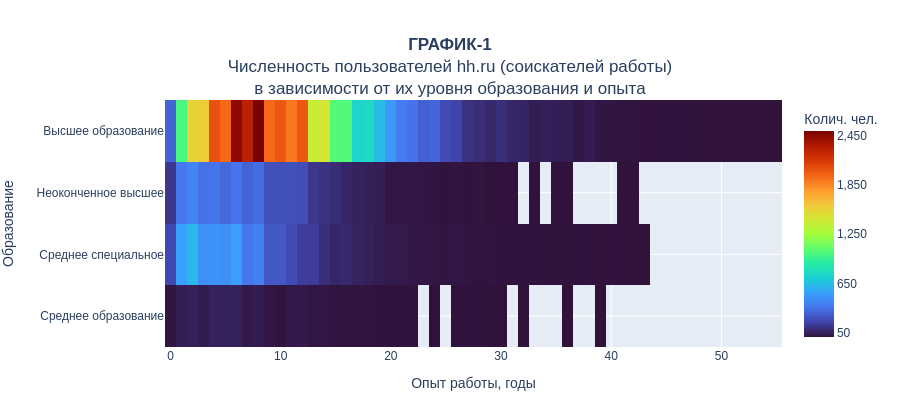

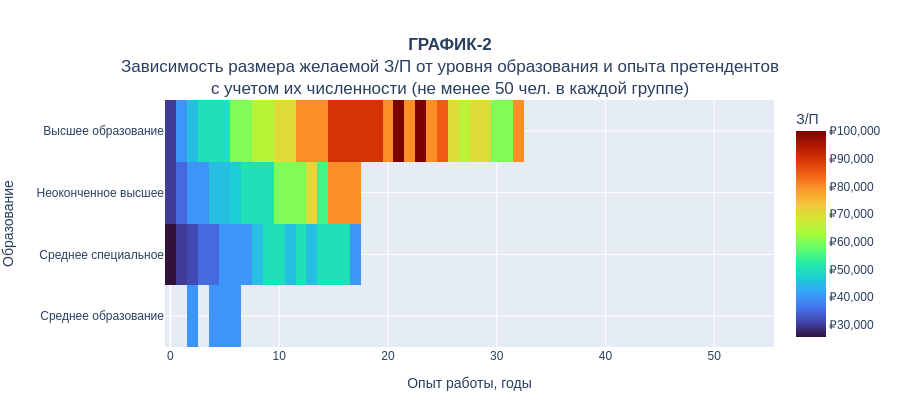

In [79]:
# Для получения репрезентативных сведений об опыте работы, создаем признак
# "Возраст начала работы", который не должен быть ниже трудоспособного (16 лет)
hh["Возраст начала работы"] = hh["Возраст"] - hh["Опыт работы (год)"]

# Сводная таблица с данными о медиане желаемой З/П
# в зависимости от уровня образования и опыта работы.
hh_proc = hh[hh["Возраст начала работы"] >= 16].pivot_table(
    index="Образование",
    columns="Опыт работы (год)",
    values="ЗП (руб)",
    aggfunc=np.median,
)

# Сводная таблица с данными о численности соискателей
# по уровню образования и опыту работы.
hh_count = hh[hh["Возраст начала работы"] >= 16].pivot_table(
    index="Образование",
    columns="Опыт работы (год)",
    values="ЗП (руб)",
    aggfunc=len,
)

# Тепловая карта численности соискателей по уровню образования и опыту работы
fig1 = px.imshow(
    hh_count,
    color_continuous_scale="turbo",  # цветовая гамма
)

fig1.update_layout(
    title_text="<br>".join(
        [
            "<b>ГРАФИК-1</b>",
            "Численность пользователей hh.ru (соискателей работы)",
            "в зависимости от их уровня образования и опыта",
        ]
    ),
    margin=dict(t=100, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Опыт работы, годы",
    coloraxis_colorbar_title_text="Колич. чел.",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_dtick=150,
    coloraxis_colorbar_tick0=50,
    coloraxis_colorbar_ticklabelstep=4,
    showlegend=False,
)


# Настройка шаблона наведения курсора мыши
fig1.update_traces(
    customdata=hh_proc,
    hovertemplate="<br>".join(
        [
            "Опыт работы: %{x:.0f}",
            "%{y}",
            "Соискателей: %{z:,.0f} чел.",
            "Желаемая З/П: ₽%{customdata:,.0f}",
        ]
    ),
    name="",
)


# Для получения репрезентативных данных по исследуемой зависимости
# удаляем из сводной таблицы З/П сведений по тем группам, по которым представлено менее 50 резюме.
for row in range(hh_proc.shape[0]):
    for col in range(hh_proc.shape[1]):
        if hh_count.iloc[row, col] < 50:
            hh_proc.iat[row, col] = np.nan
            pass

# Тепловая карта соотношения медианной З/П с уровнем образования и опытом работы
# с учетом численности групп.
# (более 50 резюме для каждой отображаемой на графике группы).
fig2 = px.imshow(
    hh_proc,
    color_continuous_scale="turbo",  # цветовая гамма
)


fig2.update_layout(
    title_text="<br>".join(
        [
            "<b>ГРАФИК-2</b>",
            "Зависимость размера желаемой З/П от уровня образования и опыта претендентов",
            "с учетом их численности (не менее 50 чел. в каждой группе)",
        ]
    ),
    margin=dict(t=100, l=25, r=25, b=25),
    title_x=0.5,
    width=900,
    height=400,
    xaxis_title="Опыт работы, годы",
    coloraxis_colorbar_title_text="З/П",
    coloraxis_colorbar_tickformat=",.0f",
    coloraxis_colorbar_tickprefix="₽",
    coloraxis_colorbar_dtick=10000,
    showlegend=False,
)


# Настройка шаблона наведения курсора мыши
fig2.update_traces(
    customdata=hh_count,
    hovertemplate="<br>".join(
        [
            "Опыт работы: %{x:.0f}",
            "%{y}",
            "Желаемая З/П: ₽%{z:,.0f}",
            "Соискателей: %{customdata:,.0f} чел.",
        ]
    ),
    name="",
)


fig1.show("png")
fig2.show("png")
# fig1.write_html("graphs/graph11.html")
# fig2.write_html("graphs/graph12.html")


**Выводы**

1. Подавляющее большинство соискателей имеет высшее образование, далее по убывающей: среднее-специальное, н/высшее и среднее образование (незначительное количество претендетов).<br><br>
1. Высокий уровень образования имеет определяющее влияние на размер З/П независимо от опыта работы (кроме высшего и н/высшего у лиц, не имеющих опыта).<br><br>
1. С увеличением опыта работы размер желаемой З/П имеет тенденцию к росту.<br><br>
1. Опыт работы имеет большее влияние на размер З/П, чем возраст претендента на трудоустройство. Максимальные значения З/П, полученные при исследовании опыта работы для высшего, н/высшего и среднего специального образования, для всех категорий выше (100, 80 и 50 тыс. руб.), чем полученные при исследовании возраста (90, 70 и 45 тыс. руб., соответственно).<br><br>
1. Соискатели без опыта работы, имеющие высшее и н/высшее образование, претендуют на более высокую З/П (30 тыс. руб.), чем имеющие среднее специальное образование (25 тыс. руб.).<br><br>
1. Внутри категорий по уровню образования среди претендентов: <br><br>
    * **с высшим образованием** - самая многочисленная группа имеет опыт работы 6-8 лет (желаемая З/П 60-65 тыс. руб.), далее, с увеличением опыта, количество соискателей снижается; при этом, желаемая З/П с увеличением опыта работы сначала растет вплоть до 100 тыс рублей для 21-23-х лет опыта, а затем прослеживается тендеция на её снижение;<br><br>
    * **с неконченным высшим образованием** - самая многочисленная группа имеет опыт работы 2 года (желаемая З/П 40 тыс. руб.);  максимальные размер желаемой З/П - 80 тыс. руб. у соискателей с опытом работы 15-17 лет;<br><br>
    * **со средним специальным образованием** - самая многочисленные группа имеет опыт работы 2 года (желаемая З/П 31,5 тыс. руб.); максимальный размер желаемой З/П - 50 тыс. руб. у соискателей с опытом работы 9-16 лет;<br><br>
    * **со средним образованием** - самая многочисленная группа имеет опыт работы 2-6 лет, размер желаемой З/П составляет 40 тыс. рублей. 


[Скачать график-1 в html](https://cloud.mail.ru/public/wXTY/tNKbH5aFn)

[Скачать график-2 в html](https://cloud.mail.ru/public/JHYa/V4vAYNpPq)

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [80]:
before=hh.shape[0]
hh.drop_duplicates(inplace=True)
after=hh.shape[0]
print(f"Количество полных копий {before} - {after} = {before-after}")


Количество полных копий 44744 - 44586 = 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [81]:
hh_nan = hh.isna().sum()
hh_nan = hh_nan[hh_nan > 0]
print(hh_nan)


Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
Опыт работы (год)                  168
Возраст начала работы              168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [82]:
hh = hh.dropna(
    subset=hh_nan.index[:2],
)

hh = hh.fillna(
    value={k: hh[k].median() for k in hh_nan.index[2:]},
)

# Задание 5.3
print(f"Результирующее среднее значение в столбце «Опыт работы (месяц)» = {hh['Опыт работы (месяц)'].mean():.0f}")

Результирующее среднее значение в столбце «Опыт работы (месяц)» = 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [83]:
mask = hh[(hh["ЗП (руб)"] > 1000000) | (hh["ЗП (руб)"] < 1000)]
print(f"Количество выбросов = {mask.shape[0]}") # Задание 5.4
hh.drop(mask.index, inplace=True)

Количество выбросов = 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [84]:
mask = hh[hh["Возраст"] <= hh["Опыт работы (год)"]]
print(f"Количество выбросов = {mask.shape[0]}") # Задание 5.5
hh.drop(mask.index, inplace=True)

Количество выбросов = 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

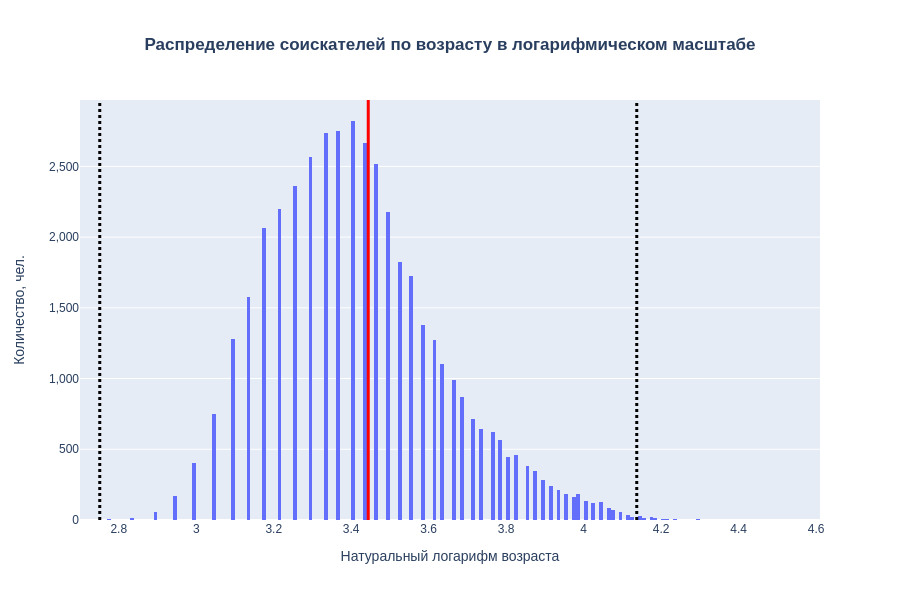

Асимметрия распределения = 0.4523800015449524


,Ищет работу на должность:,"Город, переезд, командировки",Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (год),Возраст начала работы
31137,Менеджер по работе с клиентами,"Санкт-Петербург , не готов к переезду , не гот...","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06 09:13:00,Не указано,Среднее образование,М,15,2,...,False,False,False,True,True,True,False,10000.0,0.0,15.0
32950,Тестировщик игр,"Канск , не готов к переезду , не готов к коман...",OOO ЖМЫХ,Тестировщик ПО,2019-04-09 16:02:00,Не указано,Среднее специальное,М,15,3,...,False,False,True,False,False,False,False,2000.0,0.0,15.0
33654,Frontend-разработчик,"Санкт-Петербург , не готов к переезду , готов ...",Freelance,Frontend-разработчик,2019-04-19 23:27:00,Не указано,Среднее специальное,М,100,30,...,False,True,True,False,True,True,False,60000.0,2.0,98.0


In [85]:
log_age = np.log(hh["Возраст"])
fig = px.histogram(
    data_frame=log_age,
    title="<b>Распределение соискателей по возрасту в логарифмическом масштабе</b>",
    x="Возраст",
    width=900,
    height=600,
)

fig.update_layout(
    title_x=0.5,
    xaxis_title_text="Натуральный логарифм возраста",
    yaxis_title_text="Количество, чел.",
    yaxis_tickformat=",.0f",
)

# Вычисление среднего и границ интервала
# для отображения на графике.
mu = log_age.mean()
sigma = log_age.std()
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Вывод линий
fig.add_vline(
    mu,
    line_width=3,
    line_color="red",
)

fig.add_vline(
    lower_bound,
    line_width=3,
    line_dash="dot",
    line_color="black",
)

fig.add_vline(
    upper_bound,
    line_width=3,
    line_dash="dot",
    line_color="black",
)


# Поиск и удаление выбросов
def outliers_z_score(
    data: pd.DataFrame,
    feature: str,
    log_scale: bool = False,
    left: int = 3,
    right: int = 3,
) -> tuple:
    """Поиск выбросов методом z-отклонений, с логарифмированием (опционально)"""

    x = np.log(data[feature] + 1) if log_scale else data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return outliers, cleaned


hh_outliers, hh_cleaned = outliers_z_score(
    data=hh,
    feature="Возраст",
    log_scale=True,
    right=4,
)

hh.drop(hh_outliers.index, inplace=True)

# Вывод результатов
fig.show("png")
# fig.write_html("graphs/graph13.html")
print(f"Асимметрия распределения = {log_age.skew()}")
display(hh_outliers)

**Выводы**

* Распределение логнормальное, имеет небольшую правую асимметрию.<br><br>
* К категории выбросов отнесены соискатели нетрудоспобного возраста (15 и 100 лет), приём которых на работу практически невозможен. Во втором случае (100 лет), вероятно, имеет место намеренное искажение пользователем, разместившим резюме, сведений о себе.

[Скачать график в html](https://cloud.mail.ru/public/bRYw/6g9En3QC9)